In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "file"):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    fileName = picName + "_error.pdf"
    fig_1.tight_layout() # This minimises whitespace around the axes.
    fig_1.savefig(fileName) # Save figure to current directory in PDF format
    fileName = picName + "_acc.pdf"
    fig_2.tight_layout() # This minimises whitespace around the axes.
    fig_2.savefig(fileName) # Save figure to current directory in PDF format
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [11]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']


# 2 layer CNN

In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ELULayer, MaxPoolingLayer, ConvolutionalLayer, ReshapeLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.5
num_epochs = 50
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer(output_shape=(1,28,28)),
    ConvolutionalLayer(num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5),
    ELULayer(),
    MaxPoolingLayer(batch_size, num_input_channels=5,
                 input_dim_1=24, input_dim_2=24,
                 kernel_dim_1=2, kernel_dim_2=2),
    ConvolutionalLayer(num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5),
    ELULayer(),
    MaxPoolingLayer(batch_size, num_input_channels=10,
                 input_dim_1=8, input_dim_2=8,
                 kernel_dim_1=2, kernel_dim_2=2),
    ReshapeLayer(),

    AffineLayer(160, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Train the network
fb1 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "ReLU")

KeyboardInterrupt: 

In [7]:
# Load data
# import pickle
# inputFile = 'CNN_1_Layer_LR0p1.data'
# fd = open(inputFile, 'rb')
# fb1 = pickle.load(fd)

# Load data
import pickle
inputFile = 'CNN_1_Layer_LR0p3.data'
fd = open(inputFile, 'rb')
fb2 = pickle.load(fd)

# Load data
# import pickle
# inputFile = 'CNN_1_Layer_LR0p5.data'
# fd = open(inputFile, 'rb')
# fb3 = pickle.load(fd)

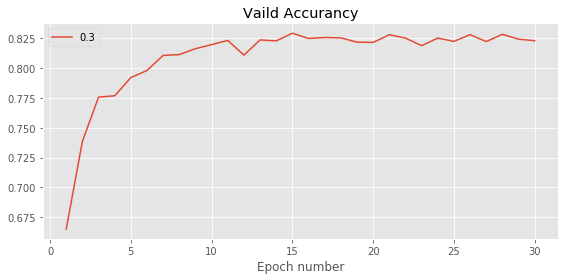

In [13]:
stats = {}
initStrategy = list(['0.3'])
stats[0] = (fb2)[0]
keys = fb2[1]
#keys[1] = feedback_1[1]
#keys[2] = feedback_2[1]
#keys[3] = feedback_3[1]
fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
for k in {0}:
    stat = stats[k]
    ax_1.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['acc(valid)']], label=initStrategy[k])
ax_1.legend(loc=0)
ax_1.set_title('Vaild Accurancy')
ax_1.set_xlabel('Epoch number')
    

fileName = "CNN_1L_LR0p3.pdf"
fig_1.tight_layout() # This minimises whitespace around the axes.
fig_1.savefig(fileName) # Save figure to current directory in PDF format